# VAFT libary and VEST Database guide

This notebook is about how to insatall VAFT libarary and access data in VEST Database. It is just for temporary use. And will be given some changes. Currently not all data is stored in the HSDS so you might just have to create ods by yourself.
To use this first install h5pyd, h5py/ and omas.(pip install h5pyd h5py omas)  
Then just follow this [link](https://satelite2517.github.io/vest/guide/Installation/#configuration) you do not need to do the other thing, just make configuration step in your command line.

And also the we have to use omas source code since the change of omas code is not yet.

## Background Overview

The VEST integrated data analysis platform is structured according to FAIR (Findable, Accessible, Interoperable, and Reusable) data principles and the IMAS (Integrated Modeling and Analysis Suite) standards, offering a unified environment for experimental and simulation data management, analysis, and visualization. The core components include:

1. **VEST-IMAS Database**
2. **VAFT Python Library**
3. **Data Pipeline**

### 1. VEST IMAS Database

The database is built on OMAS (Ordered Multidimensional Array Structure) interfacing and uses the HSDS (Highly Scalable Data Service) backend.

* **Data Storage**: HDF5 format via HSDS, enabling parallel I/O and cloud compatibility.
* **Data Structure**: Compatible with IMAS Interface Data Structure (IDS) through OMAS, ensuring standardization and interoperability.
* **Authentication and Access**: Managed through VAFT Python library for remote and flexible querying.

### 2. VAFT Python Library

VAFT (Versatile Analysis Framework for Tokamak) python libray provides modular and extensible Python routines for data access, analysis, modeling, and visualization. 
Its primary modules include:

#### Database Module

* Accesses both legacy SQL and HSDS-based databases.
* Performs dynamic queries aligned with IMAS IDS.

#### Formula Module

* Offers reusable formulae for equilibrium parameters, tokamak circuit equations, and Green’s functions.
* Interacts with OMAS objects to provide derived parameters.

#### Plot Module

* Enables versatile visualization, including scatter plots, time-series, and spatial mappings.
* Facilitates comparative analysis between experiments and simulations.

#### Process Module

* Manages preprocessing of diagnostic data, including outlier detection, signal conditioning, and indexing based on plasma characteristics (e.g., plasma current onset).

#### OMAS Module

* Simplifies interactions with OMAS APIs and IDS structures.
* Manages derived parameter updates, time conversions, and API abstractions.

#### Machine Mapping Module

* Translates raw diagnostic data into structured IDS-compliant ODS objects.

#### Code Module

* Interfaces with simulation tools (EFIT, CHEASE, GPEC).
* Handles simulation execution and data conversion to IMAS formats.

### 3. Data Processing Pipeline

Using Snakemake workflow management system, VEST integrated data analysis platform orchestrates the data pipeline, ensuring reproducibility and traceability across multiple processing steps:
* **Diagnostics Processing**: Automated trimming, calibration, integration, and storage of routinely acquired signals. Also automatic update newly uploaded diagnostic file data.
* **Electromagnetic Modeling**: Eddy current calculation through 2D geometry representation and response matrix computation.
* **Magnetic Equilibrium Reconstruction (EFIT)**: Equilibrium fitting using magnetic diagnostics and eddy current profiles.
* **Equilibrium Refinement (CHEASE)**: Refinement of EFIT results for enhanced accuracy and convergence.
* **Linear MHD Stability Analysis (GPEC - DCON/RDCON/STRIDE)**: Evaluation of linear stability of plasma ($\delta W$ using DCON, $\Delta^\prime using RDCON, STRIDE Code).
* **Core Profile Fitting**: Kinetic diagnostics mapping onto equilibrium profiles for core electron temperature and density estimation.

Also based on these dataset, data mining conducted to extract insights from dataset.

## Install VAFT Library and Connect to DB

This guide explains how to set up and install the VAFT library from source. It includes installing prerequisites, cloning the repository, and configuring the environment for either development or regular usage.

### Prerequisites

Before installing the VAFT library, ensure the following tools are installed on your system:

* **Anaconda**: [Installation Guide](https://www.anaconda.com/docs/getting-started/anaconda/install)
* **Git**: [Download Git](https://git-scm.com/downloads)

### Clone the Repository

Open a terminal application (Terminal, Anaconda Shell, PowerShell, PuTTY, etc.) and execute the following commands:

```bash
cd {desired_directory}
git clone https://github.com/VEST-Tokamak/vaft.git
```

### Install Required Packages and VAFT Library

Navigate to the cloned repository directory and create a new Anaconda environment:

```bash
cd vaft
conda create --name vaft python=3.10
conda activate vaft
```

Install the VAFT library with the required dependencies:

```bash
pip install .
```

For development purposes, use editable mode:

```bash
pip install -e .
```

### Configure the Database Environment

If you want to use the VEST database, you should install the h5pyd library:

```bash
pip install h5pyd==0.20.0 --no-deps  # Resolves version conflict (safe for usage)
```


Run the configuration tool:

```bash
hsconfigure
```

You will see the prompt: "Enter new values or accept defaults in brackets with Enter."

Provide the following values:

```
Server endpoint - http://147.46.36.244:5101
Username - reader
Password - test
```

If the configuration is successful, you will see the message:

```
Testing connection... connection ok
```


## Checking the connection with the VEST database

If the below answers `true`, you're ready to use the data. If you get `false` instead, then check out the guide in the link above and check the connection guide page 

In [11]:
import vaft
from omas import *
vaft.database.is_connect()

True

## Get data from VEST database and Save it to your own DB

Firstly you can get the original data from VEST system, in the public folder. (You can also save and load the data in your own folder)

- VEST.database.load(`variable name of ods`, `shot number`)
- VEST.database.save(`variable name of ods`, `shot number`, `filname` = None, `env`=server)
    - if you want to use your own filename the user filename otherwise the file will be save with default name `shotnumber.h5`.
    - Also if you want to save the data to local the set the `env` to 'local'


note that default public database is named 'public'

In [2]:
shotnumbers=vaft.database.exist_file('public')

['114.h5', '12345.h5', '38000.h5', '38012.h5', '38019.h5', '38025.h5', '38026.h5', '38027.h5', '38028.h5', '38029.h5', '38030.h5', '38032.h5', '38034.h5', '38035.h5', '38036.h5', '38038.h5', '38039.h5', '38041.h5', '38042.h5', '38043.h5', '38044.h5', '38045.h5', '38046.h5', '38047.h5', '38048.h5', '38049.h5', '38050.h5', '38052.h5', '38053.h5', '38055.h5', '38057.h5', '38058.h5', '38059.h5', '38060.h5', '38061.h5', '38062.h5', '38063.h5', '38064.h5', '38065.h5', '38066.h5', '38067.h5', '38068.h5', '38090.h5', '38091.h5', '38092.h5', '38093.h5', '38094.h5', '38095.h5', '38096.h5', '38097.h5', '38098.h5', '38099.h5', '38100.h5', '38101.h5', '38104.h5', '38105.h5', '38107.h5', '38167.h5', '38171.h5', '38173.h5', '38178.h5', '38179.h5', '38180.h5', '38184.h5', '38187.h5', '38188.h5', '38189.h5', '38190.h5', '38191.h5', '38192.h5', '38193.h5', '38194.h5', '38195.h5', '38196.h5', '38197.h5', '38198.h5', '38199.h5', '38200.h5', '38201.h5', '38202.h5', '38203.h5', '38204.h5', '38205.h5', '3820

You can directly save your file to your directory and find out what kind of h5 is in your directory.

In [ ]:
ods=vaft.database.load()
# ods=vaft.database.load(39915) # same

INFO:root:HttpConn.init - timeout = 180
INFO:root:GET: http://147.46.36.145:5101/ [/public/39915.h5] timeout: 180
INFO:root:status: 200
INFO:root:got domain json: 1927 bytes
INFO:root:GET: http://147.46.36.145:5101/datasets/d-905c8edc-c3018d26-ac7a-76208f-722a8e [/public/39915.h5] timeout: 180
INFO:root:status: 200
INFO:root:selection: start (0,) stop [2097152] step (1,)
INFO:root:page_stop: 2097152
INFO:root:page_mshape: (2097152,)
INFO:root:GET: http://147.46.36.145:5101/datasets/d-905c8edc-c3018d26-ac7a-76208f-722a8e/value [/public/39915.h5] timeout: 180
INFO:root:status: 200
INFO:root:retrieved 512 http_chunks  2097152 total bytes
INFO:root:binary response, 2097152 bytes
INFO:root:got arr: (2097152,), cleaning up shape!
INFO:root:selection: start (81788928,) stop [81870184] step (1,)
INFO:root:page_stop: 81870184
INFO:root:page_mshape: (81256,)
INFO:root:GET: http://147.46.36.145:5101/datasets/d-905c8edc-c3018d26-ac7a-76208f-722a8e/value [/public/39915.h5] timeout: 180
INFO:root:st

Successfully loaded ODS data for shot: 39915


You can load multiple shots using a list of shot numbers, and you can also combine their data into a single ODC (Ordered Data Collection).
ODC provides a convenient way to compare multiple experimental shots.


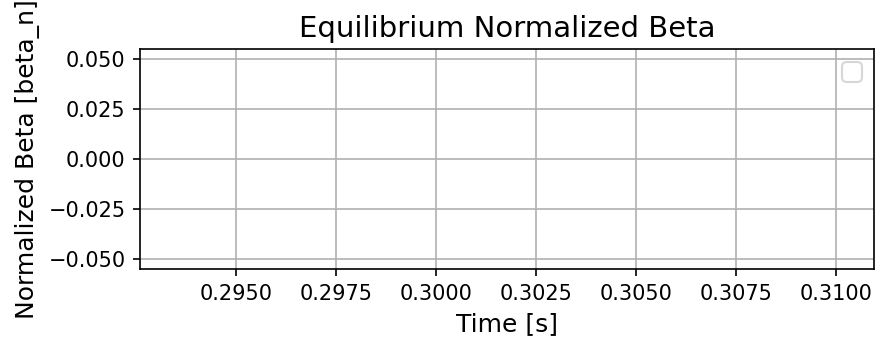

In [10]:
vaft.plot.time_equilibrium_beta_n(ods1)
vaft.plot.time_equilibrium_beta_n(ods1)

In [49]:
ods_combined=vaft.omas.combine_ods([ods_efit, ods_chease])

In [ ]:
shotnumber=44734
ods_diagnostic=load_omas_json(f'/srv/vest.filedb/public/{shotnumber}/omas/{shotnumber}_diagnostic.json')
ods_efit=load_omas_json(f'/srv/vest.filedb/public/{shotnumber}/omas/{shotnumber}_chease.json')
ods_chease=load_omas_json(f'/srv/vest.filedb/public/{shotnumber}/omas/{shotnumber}_efit.json')
ods_combined=load_omas_json(f'/srv/vest.filedb/public/{shotnumber}/omas/{shotnumber}_combined.json')

In [ ]:
vaft.plot.equilibrium_psi_norm_pressure(ods_efit)
vaft.plot.equilibrium_psi_norm_pressure(ods_chease)
vaft.plot.equilibrium_psi_norm_pressure(ods_combined)

interactive(children=(Dropdown(description='Time Slice:', options=(('Idx: 0 | t=0.305s | Ip=-0.19MA', '0'), ('…

interactive(children=(Dropdown(description='Time Slice:', options=(('Idx: 0 | t=0.305s | Ip=0.20MA', '0'), ('I…

interactive(children=(Dropdown(description='Time Slice:', options=(('Idx: 0 | t=0.305s | Ip=-0.19MA', '0'), ('…

In [38]:
ods3['equilibrium']['time_slice'][2]['constraints'].keys()

['b_field_tor_vacuum_r',
 'bpol_probe',
 'diamagnetic_flux',
 'flux_loop',
 'ip',
 'pf_current']

In [31]:
vaft.plot.equilibrium_psi_norm_pressure(ods2)

Required data for psi_norm not found. Updating equilibrium coordinates...


ValueError: `equilibrium.time_slice.0.profiles_1d.psi` has no data

{'ax': {(1, 3, 1): <Axes: >,
  (2, 3, 2): <Axes: title={'center': '$\\,$ Pressure'}, ylabel='$p$ [kPa]'>,
  (2,
   3,
   3): <Axes: title={'center': '$q$ Safety factor'}, ylabel='$q$ Safety factor'>,
  (2,
   3,
   5): <Axes: title={'center': '$P\\,^\\prime$ source function'}, xlabel='$\\rho$', ylabel='$P\\,^\\prime$ [kPa Wb$^{-1}$]'>,
  (2,
   3,
   6): <Axes: title={'center': '$FF\\,^\\prime$ source function'}, xlabel='$\\rho$', ylabel='$FF\\,^\\prime$ [T$^2$ m$^2$ Wb$^{-1}$]'>}}

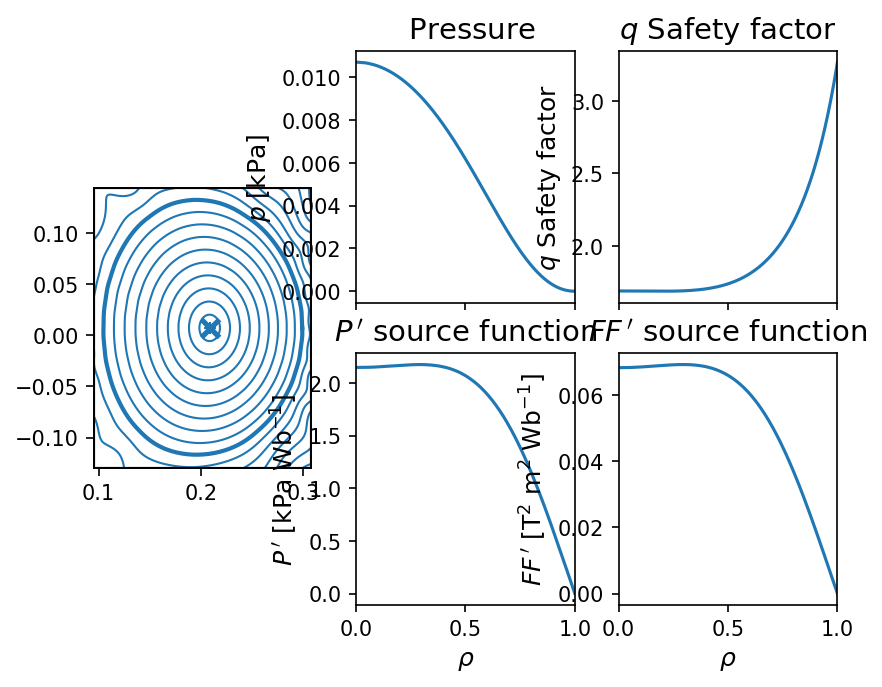

In [63]:
ods3.plot_equilibrium_summary()


In [53]:
[ods1, ods2, ods3]=vaft.database.load([44734, 39915, 44396], 'public')
odc=ODC()
odc['0'] = ods1
odc['1'] = ods2
odc['2'] = ods3

vaft.plot.equilibrium_psi_norm_j_tor(ods1)
vaft.plot.equilibrium_psi_norm_j_tor(ods2)
vaft.plot.equilibrium_psi_norm_j_tor(ods3)

Successfully loaded ODS data for shot: 44734
Successfully loaded ODS data for shot: 39915
Successfully loaded ODS data for shot: 44396
Successfully loaded a list of ODS data
Required data for psi_norm not found. Updating equilibrium coordinates...


interactive(children=(Dropdown(description='Time Slice:', options=(('Idx: 0 | t=0.305s | Ip=0.19MA', '0'), ('I…

Required data for psi_norm not found. Updating equilibrium coordinates...


interactive(children=(Dropdown(description='Time Slice:', options=(('Idx: 0 | t=0.316s | Ip=0.08MA', '0'), ('I…

Required data for psi_norm not found. Updating equilibrium coordinates...


In [9]:
# Authentication saving is now restricted to admin users only.
vaft.database.save(ods, 39915)

INFO:root:GET: http://147.46.36.145:5101/about [None] timeout: (10, 1000)
INFO:root:status: 200
INFO:root:GET: http://147.46.36.145:5101/about [None] timeout: (10, 1000)
INFO:root:status: 200
INFO:root:GET: http://147.46.36.145:5101/about [None] timeout: (10, 1000)
INFO:root:status: 200
